<a href="https://colab.research.google.com/github/QOneK/Ryerson-Data-Analytics-Final-Project-for-Kyuhwan-Kim/blob/master/Data_Analytics_Final_Project_for_Kyuhwan_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analytics Final Project for Kyuhwan Kim**

---
Dateset can be found at:
https://www.kaggle.com/aaron7sun/stocknews


# Importing files into Google Colabs

---



This code allows you to connect Google Colabs with Google Drive. This method was done so that the files do not need to be inputted everytime Colabs was run. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


** Use this portion of code if you cannot connect Google Drive and want to manually upload the dataset files**

To use this portion of code, uncomment the # signs

In [3]:
#from google.colab import files
#uploaded = files.upload()

# Loading Python Libraries and CSV files, then running EDA (Exploratory Data Analysis)

---



Import the necessary libraries: Pandas, Numpy, Matplotlib and sklearn

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Read the .csv files and put them into variables 

Note: Will need to connect to Google Drive for this portion to work. 
If cannot connect, use the upload method:

---

```
from google.colab import files
uploaded = files.upload()
```



In [5]:
reddit = pd.read_csv('/content/drive/My Drive/Coding/GitHub for Kyuhwan Kim/Ryerson Data Analytics Final Project for Kyuhwan Kim/Dataset/RedditNews.csv')
djia = pd.read_csv('/content/drive/My Drive/Coding/GitHub for Kyuhwan Kim/Ryerson Data Analytics Final Project for Kyuhwan Kim/Dataset/upload_DJIA_table.csv')
reddit_djia = pd.read_csv('/content/drive/My Drive/Coding/GitHub for Kyuhwan Kim/Ryerson Data Analytics Final Project for Kyuhwan Kim/Dataset/Combined_News_DJIA.csv')

## EDA (Exploratory Data Analysis)

### EDA for Reddit Dataframe

.info() method allowed to see what the name of attributes, number of rows and the data types of the columns



In [6]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    73608 non-null  object
 1   News    73608 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


Used the .min() and .max() method to find the range of the dates

In [7]:
#to find the minimum date of reddit
reddit['Date'].min()

'2008-06-08'

In [8]:
#to find the maximum date of reddit
reddit['Date'].max()

'2016-07-01'

.nunique() method allowed to see how many unique dates and articles that were present

In [9]:
#number of unique inputs 
reddit.nunique()

Date     2943
News    73537
dtype: int64

### EDA for DJIA Dataframe

.info() method allowed to see what the name of attributes, number of rows and the data types of the columns

In [10]:
djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


Used .min() and .max methods to find the range of the dates. 

In [11]:
djia['Date'].min()

'2008-08-08'

In [12]:
djia['Date'].max()

'2016-07-01'

.describe() method allowed to display rudimentary statistics about the datasets. Based on experimentation, this works only with numeric datatypes. 

In [13]:
djia.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


Visual Representation DIJA (Dow Jones Industrial Average) "Adj Close" Trends
(It seems that there are up and down movements but a general downward trend with recovery at the end)

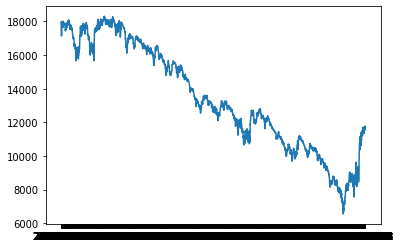

In [14]:
#this takes some time to run
plt.plot(djia['Date'],djia['Adj Close'])
plt.show()

### EDA for reddit_djia Dataframe 
This is the "cleaned" dataset; combination of both news and DJIA (adj price) label. 

In [15]:
reddit_djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1989 non-null   object 
 1   Label        1989 non-null   int64  
 2   Top1         1989 non-null   object 
 3   Top2         1989 non-null   object 
 4   Top3         1989 non-null   object 
 5   Top4         1989 non-null   object 
 6   Top5         1989 non-null   object 
 7   Top6         1989 non-null   object 
 8   Top7         1989 non-null   object 
 9   Top8         1989 non-null   object 
 10  Top9         1989 non-null   object 
 11  Top10        1989 non-null   object 
 12  Top11        1989 non-null   object 
 13  Top12        1989 non-null   object 
 14  Top13        1989 non-null   object 
 15  Top14        1989 non-null   object 
 16  Top15        1989 non-null   object 
 17  Top16        1989 non-null   object 
 18  Top17        1989 non-null   object 
 19  Top18 

In [16]:
reddit_djia.describe()

,Label,Unnamed: 27
count,1989.000000,0.0
mean,0.535445,NaN
std,0.498867,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN
max,1.000000,NaN


How many of the rows are 1? 0? in the class label

In [17]:
reddit_djia['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

There appears to be more 1 (up) than 0 (down). However, from the trendline from DJIA Adj Price, we can see that there is actually a downward trend. Perhaps the magnitude of the up/down wasn't taken into consideration. 

This is to check the date range. From observation, we can see that the date range of the final "cleaned" dataset matches that of DIJA dataset. There seems to be extra erraneous data at the news dataset. 

In [18]:
reddit_djia['Date'].min()

'1/10/2011'

In [19]:
reddit_djia['Date'].max()

'9/9/2015'

Plot Pie graph of Label
https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

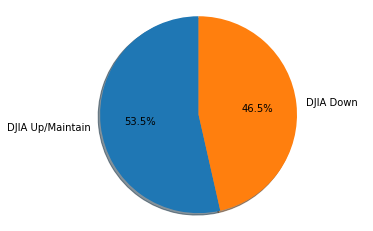

In [20]:
labels = 'DJIA Up/Maintain', 'DJIA Down'
sizes= [1065/1989, 924/1989]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Checking if there are null values 

Check if there are null values that needs to be dealt with before merging the data. We can see that there were no null values. 

In [21]:
#check null values for reddit
reddit.isnull().values.sum()

0

In [22]:
#check null values for djia
djia.isnull().values.sum()

0

# Combining Reddit articles with DJIA datasets to create "cleaned, final" dataset



Result: 
cleaned final dataset named "**result**"

The final cleaned dataset will be created using this procedure:

a) create an extra column called 'Label' (which are the difference between proceeding day)

b) using an if-statement, categorize:
   1 (up) when DJIA increased or maintained the same
   0 (down) when DJIA decreased

c) organize the articles into the corresponding dates. This will involve grouping the articles into similar dates. 

d) merge the DJIA 'Label' column and the articles on 'Dates' column. 

## Creating DJIA 'Label'




I have noticed that the dates of DJIA and Reddit datasets are in asc/desc order. For ease of cleaning, before the label is created, instead of desc, use asc order for the djia dataset.

In [23]:
#https://datatofish.com/sort-pandas-dataframe/
djia.sort_values(by = ['Date'], inplace=True, ascending=True)

Copy 'Adj Close' column and run .diff() method on the column to see the day by day changes in the DJIA.

In [24]:
djia['Diff']= djia['Adj Close']

#https://stackoverflow.com/questions/39479919/how-do-i-subtract-the-previous-row-from-the-current-row-in-a-pandas-dataframe-an
djia['Diff']=djia.Diff.diff()

In [25]:
#This is run just in case there are N/A values. These will be filled with zeros. 
djia=djia.fillna(0)

This section will take the values of 'Diff' column and using if clauses, determine the value of the class variable.

In [26]:
#https://guillim.github.io/pandas/2018/10/22/Pandas-if-else-on-columns.html

conditions = [
    (djia['Diff'] >= 0.0),
    (djia['Diff'] < 0.0)]
choices = [int(1),int(0)]

djia['Label'] = np.select(conditions, choices, default='null')

This section is to reset the index [count row from 0 onwards]. Prior to input of this code, the index would go in desc order from index 1989. 

In [27]:
djia.reset_index(drop=True, inplace=True)
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Diff,Label
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.000000,1
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,48.029297,1
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-139.879882,0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-109.509766,0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,82.969727,1


The first label by default should be 0 even though Diff = 0.0
This was manually added since the previous block of code didn't account for the exception of the first label value. 

In [28]:
djia.iloc[0,-1]=int(0)

In [29]:
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Diff,Label
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.000000,0
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,48.029297,1
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-139.879882,0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-109.509766,0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,82.969727,1


Prior to casting the Label column as integer, the column was an object. Changed since it is numerical value; more specifically integer. 

In [30]:
djia['Label'] = djia['Label'].astype('int')

## Reorganizing Reddit News Dataset

Initally, the dataset had two columns: Date, News

The dataset was formated so that each row is organized in following fashion: 
Date, Top1 ... Top25 

Basically, the news articles were compiled into one single date and outputted horizontally. 

On the news dataset, this portion of code will organize the news articles into its corresponding dates using list of lists.

In [31]:
#This is for .at function
#https://www.geeksforgeeks.org/python-pandas-dataframe-at/

#declaration of variables
previous_date = reddit.at[0, 'Date']
newslist= []
sub_newslist = []
date_list = [previous_date]

"""
This 'for loop' will iterate from the beginning to the end of the list of dataset

Each iteration of the loop, the Date column will go down. The date variable will 
be the new date value. Also, News will be stored into sub_newslist(temp list for storing articles in a single date)
At the end of the loop, the 

The 'if statement' will be activated when the value of 'Date' changes. 

When the if statement is run:
a) the date value will be inputted towards date_list list
b) values collected in sub_newslist will be inputted into newslist list
c) sub_newslist list (used as a temp collector) will be emptied 
"""

for i in range(0,len(reddit['Date'])):
  date = reddit.at[i,'Date']
  if date != previous_date:
    date_list.append(date)
    newslist.append(sub_newslist)
    sub_newslist = []
  sub_newslist.append(reddit.at[i,'News'])
  previous_date = date

#last date needs a seperate code to add articles of final date into newslist list
newslist.append(sub_newslist)

#various print statements to check that the articles are organized correctly

"""
print(newslist[0][0])
print(newslist[-1][-1])
print(newslist[-1])
print(len(newslist))
print(len(date_list))
print(date_list[0])
print(date_list[-1])
"""

'\nprint(newslist[0][0])\nprint(newslist[-1][-1])\nprint(newslist[-1])\nprint(len(newslist))\nprint(len(date_list))\nprint(date_list[0])\nprint(date_list[-1])\n'

This portion of code will take the list and output them into a correct dataframe format

---



This code will create the labels for Top 25 articles. 

In [32]:
"""
f is f string. allows for consistency in formatting
"""
top25_labels = [f'Top{str(integer)}' for integer in list(range(1,26))]
top25_labels

['Top1',
 'Top2',
 'Top3',
 'Top4',
 'Top5',
 'Top6',
 'Top7',
 'Top8',
 'Top9',
 'Top10',
 'Top11',
 'Top12',
 'Top13',
 'Top14',
 'Top15',
 'Top16',
 'Top17',
 'Top18',
 'Top19',
 'Top20',
 'Top21',
 'Top22',
 'Top23',
 'Top24',
 'Top25']

This portion of code will output the joint database.

In [33]:
#variable declaration
relevant_dates_with_news = []
cols = []

#loop will iterate from beginning to end of the dates (created from previous block of code)
#each line of output from 'relevant_dates_with_news' will output the entire corresponding row
#to a specific date 

for i in range(0,len(date_list)):
  #date_with_news is a temporary list collector, that's why inside the loop
  date_with_news = []
  date_with_news.append(date_list[i])
  date_with_news.extend(newslist[i])
  relevant_dates_with_news.append(date_with_news)

#This portion of code makes the dataframe with the header
cols.append('Date')
cols.extend(top25_labels)
df = pd.DataFrame(columns=cols)

#The loop inside loop, relevant_dates_with_news will iterate all the dates from 
#The break component ensures that each line has max of 25 articles. 
for j in range(0, len(relevant_dates_with_news)):
  for k in range(0, len(relevant_dates_with_news[j])):
    if k > 25:
      break
    df.at[j, cols[k]] = relevant_dates_with_news[j][k]

df.head(2)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan's top court has approved blanket surveil...,CIA Gave Romania Millions to Host Secret Prisons,Groups urge U.N. to suspend Saudi Arabia from ...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...


## Combining the cleaned DJIA and Reddit datasets

The finalized databases are merged. The 'djia' is the base database where the newly created 'df' database will merge on 'Date' column. As of result,
we expect the erraneous dates from the Reddit News will be automatically cropped
if the date range goes beyond DJIA information.

In [34]:
result_all = pd.merge(djia, df, how='inner', on=['Date'])
result_all
result = result_all

'result_all' will have all the necessary data. This can be used to do quantitative analysis as well. 

However, for classification, we can crop for only necessary 

In [35]:
"""
CAUTION: Run this code ONLY once. Since, the drop code if run again will remove 
more columns than necessary

If unappropriate result appears, run the previous block of code to reset 
result variable and run this portion again

The result should have Date, Label, Top1 .. Top 25 columns
"""
result.drop(result.iloc[:, 1:8], axis=1, inplace=True)
result.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


This portion of code tests whether or not each row has 25 articles. 
We find that there are some null values present. 

With this info, manually checked...

**Though no columns had >25 articles, it was found that there were some dates with <25 articles.**

In [36]:
"""
This portion of code found that BEFORE EVEN CLEANING DATA that there were some dates where it did not =25 articles

Luckily, most can be neglected since when the dates are merged, most were taken out.

However, it was later found that even after merging that some dates had <25 because of null values
"""

a = list(reddit['Date'])

a,b = np.unique(a, return_counts=True)
a[b != 25]

array(['2008-10-26', '2009-09-05', '2009-09-12', '2009-09-13',
       '2009-09-15', '2009-09-19', '2009-09-20', '2009-09-26',
       '2009-10-10', '2009-10-25', '2009-12-24', '2011-04-21'],
      dtype='<U10')

This was a test to see where the NaN data can be found with the final dataset.

The original dataset also had the NaN at the same locations. 
Therefore, the accuracy to replicate the finished clean data was a sucess. 

The missing data can be neglegible since there aren't many NaN
and there are enough articles for even the non =25 article dates to run machine learning. 

---



This portion of code finds the NaN values on 'result' dataframe. 

Even when the dataset is fully 'cleaned', there are some issues to be dealt with.

In [37]:
#https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
null_columns=result.columns[result.isnull().any()]
print(result[result.isnull().any(axis=1)][null_columns].head())

                                                 Top23 Top24 Top25
277                                                NaN   NaN   NaN
348  b"Ayatollah Montazeri's Legacy:  In death he m...   NaN   NaN
681          Prince Charles wins some kind of a record   NaN   NaN


In [38]:
"""
Dates where the missing data can be found. With more detail
Scroll horizontally to the end to find some NaN values. 
"""

#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

result.iloc[[277,348,681]]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",b'Two months after the Pakistani Army wrested ...,b'N. Korean cargo ship repels pirates off Soma...,b'Canada: Stephen Harper attempts to prop up r...,b'New geological data provides hope for claims...,b'Ukraine set to block Elton John adoption bec...,b'German plane makes emergency landing',b'Street artist catches chief of the Israeli a...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...","b""Cool Saudi Feminist calls for woman's right ...","b'According to satellite surveys, as much as 8...",b'Italian Prime Minister Silvio Berlusconi has...,"b""Don't blame the system for winter travel cha...",b'Christmas Eve around the world included the ...,b'Pope knocked down before Xmas mass',b'The solar salesman who put his cow on the ma...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,Next war in line: At least 20 South Sudanese a...,Bahraini protester ends hunger strike after be...,China tries to scare motorists into safer driving,Leaked Report Shows England Hit With Three Nuc...,Japans cyclone season approaches.,Have Oman and Qatar escaped the Arab revolts?,Rioters torch Australia asylum seeker detentio...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN


Code to output the final cleaned data to file. 

When compared to final prepared data, the result was identical to the prepared data.

In [39]:
#To output the file (however, no preprocessing and feature engineering is required prior to machine learning)
result.to_excel("cleaned_data(with more processing required).xlsx")

# Natural Language Processing

Although the dataset has been cleaned and combined, there are still more work to be done. 

We still need to pre-process the data so that the machine learning algorithm can take the input. 

## Spliting Training and Testing Sets

According to the dataset provider, there were instructions about how to split the training and test datsets. 

"For task evaluation, please use data from 2008-08-08 to 2014-12-31 as Training Set, and Test Set is then the following two years data (from 2015-01-02 to 2016-07-01). This is roughly a 80%/20% split."



In [58]:
"""
When looking at the list of news, we observe that some some reason, that the news articles 
start with a lower case 'b' character followed by ' or ". 
ex. b' or b"

Therefore, first step was to remove that b' or b"
"""

result.replace("b'|b\"", " ", regex = True, inplace = True)
result.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as coun...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sou...,Russian tanks are moving towards the capital ...,"Afghan children raped with 'impunity,' U.N. o...",150 Russian tanks have entered South Ossetia ...,"Breaking: Georgia invades South Ossetia, Russ...",The 'enemy combatent' trials are nothing but ...,Georgian troops retreat from S. Osettain capi...,Did the U.S. Prep Georgia for War with Russia?',Rice Gives Green Light for Israel to Attack I...,Announcing:Class Action Lawsuit on Behalf of ...,So---Russia and Georgia are at war and the NY...,China tells Bush to stay out of other countri...,Did World War III start today?',Georgia Invades South Ossetia - if Russia get...,Al-Qaeda Faces Islamist Backlash',"Condoleezza Rice: ""The US would not act to pr...",This is a busy day: The European Union has a...,"Georgia will withdraw 1,000 soldiers from Ira...",Why the Pentagon Thinks Attacking Iran is a B...,Caucasus in crisis: Georgia invades South Oss...,Indian shoe manufactory - And again in a ser...,Visitors Suffering from Mental Illnesses Bann...,"No Help for Mexico's Kidnapping Surge"""


In [41]:
"""
Experimented with train = result['Date'] < '2015-01-01' but this gave a boolean result.
Therefore, result[true values], the values that match the conditions were ouputted with final code.
"""

train = result[result['Date'] < '2015-01-01']
test = result[result['Date'] > '2014-12-31']

In [56]:
print(train.shape)

(1611, 27)


So in testing data, there is a total of 1611 rows and 27 columns

In [57]:
print(test.shape)

(378, 27)


In training data, there are 378 rows and 27 columns

## Feature Engineering

In [86]:
"""
This selects just the news articles (dependent features). 
This is where text feature engineering will be focused on
"""
data = train.iloc[:,2:27]
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,Georgia 'downs two Russian warplanes' as coun...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sou...,Russian tanks are moving towards the capital ...,"Afghan children raped with 'impunity,' U.N. o...",150 Russian tanks have entered South Ossetia ...,"Breaking: Georgia invades South Ossetia, Russ...",The 'enemy combatent' trials are nothing but ...,Georgian troops retreat from S. Osettain capi...,Did the U.S. Prep Georgia for War with Russia?',Rice Gives Green Light for Israel to Attack I...,Announcing:Class Action Lawsuit on Behalf of ...,So---Russia and Georgia are at war and the NY...,China tells Bush to stay out of other countri...,Did World War III start today?',Georgia Invades South Ossetia - if Russia get...,Al-Qaeda Faces Islamist Backlash',"Condoleezza Rice: ""The US would not act to pr...",This is a busy day: The European Union has a...,"Georgia will withdraw 1,000 soldiers from Ira...",Why the Pentagon Thinks Attacking Iran is a B...,Caucasus in crisis: Georgia invades South Oss...,Indian shoe manufactory - And again in a ser...,Visitors Suffering from Mental Illnesses Bann...,"No Help for Mexico's Kidnapping Surge"""


In [87]:
"""
Removing punctuations

In regex, ^ indicates "starts with"
[] brackets returns match where such characters are found. 

Therefore, [^a-zA-Z] means, it will match only the characters and 

https://www.w3schools.com/python/python_regex.asp
"""
data.replace("[^a-zA-Z]"," ", regex = True, inplace = True)
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,Georgia downs two Russian warplanes as coun...,BREAKING Musharraf to be impeached,Russia Today Columns of troops roll into Sou...,Russian tanks are moving towards the capital ...,Afghan children raped with impunity U N o...,Russian tanks have entered South Ossetia ...,Breaking Georgia invades South Ossetia Russ...,The enemy combatent trials are nothing but ...,Georgian troops retreat from S Osettain capi...,Did the U S Prep Georgia for War with Russia,Rice Gives Green Light for Israel to Attack I...,Announcing Class Action Lawsuit on Behalf of ...,So Russia and Georgia are at war and the NY...,China tells Bush to stay out of other countri...,Did World War III start today,Georgia Invades South Ossetia if Russia get...,Al Qaeda Faces Islamist Backlash,Condoleezza Rice The US would not act to pr...,This is a busy day The European Union has a...,Georgia will withdraw soldiers from Ira...,Why the Pentagon Thinks Attacking Iran is a B...,Caucasus in crisis Georgia invades South Oss...,Indian shoe manufactory And again in a ser...,Visitors Suffering from Mental Illnesses Bann...,No Help for Mexico s Kidnapping Surge


In [88]:
"""
Converting to lower case characters
"""
#Reason is for consisentcy. For instance, georogia and Georgia will be counted as different words
#Therefore, by having all words in upper/lower case, we eliminate redundancy

for index in data:
  data[index] = data[index].str.lower()

data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,georgia downs two russian warplanes as coun...,breaking musharraf to be impeached,russia today columns of troops roll into sou...,russian tanks are moving towards the capital ...,afghan children raped with impunity u n o...,russian tanks have entered south ossetia ...,breaking georgia invades south ossetia russ...,the enemy combatent trials are nothing but ...,georgian troops retreat from s osettain capi...,did the u s prep georgia for war with russia,rice gives green light for israel to attack i...,announcing class action lawsuit on behalf of ...,so russia and georgia are at war and the ny...,china tells bush to stay out of other countri...,did world war iii start today,georgia invades south ossetia if russia get...,al qaeda faces islamist backlash,condoleezza rice the us would not act to pr...,this is a busy day the european union has a...,georgia will withdraw soldiers from ira...,why the pentagon thinks attacking iran is a b...,caucasus in crisis georgia invades south oss...,indian shoe manufactory and again in a ser...,visitors suffering from mental illnesses bann...,no help for mexico s kidnapping surge


In [89]:
#This is code to take first column and to combine the 25 articles into 1 paragraph
' '.join(str(x) for x in data.iloc[0,0:25])

' georgia  downs two russian warplanes  as countries move to brink of war   breaking  musharraf to be impeached    russia today  columns of troops roll into south ossetia  footage from fighting  youtube    russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire   afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing       russian tanks have entered south ossetia whilst georgia shoots down two russian jets    breaking  georgia invades south ossetia  russia warned it would intervene on so s side   the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it    georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video    did the u s  prep georgia for war with russia    rice gives green light for 

In [107]:
"""
Combining each column of articles into one paragraph
with loop iteration for the entire dataset
"""

headline = []

for row in range(0,len(data[index])):   #len(data[index])=1611
  headline.append(' '.join(str(x) for x in data.iloc[row,0:25]))

#notice that headline[0](the first date), 
#the 25 articles have been compiled into one paragraph
headline[-1]

'airasia flight found at the bottom of the java sea north korean defector details  human experiments     use of mentally and physically handicapped children in chemical weapons tests  the last straw  korean air ex executive cho hyun ah arrested   earlier she ordered a plane to turn back on the runway in new york after nuts were served in a bag  not on a plate south korean to drop sony film  the interview  in north korea by balloon u s  opening of oil export widens battle  the obama administration has opened a new front in the global battle for oil market share  effectively clearing the way for the shipment of as much as a million barrels per day of ultra light u s  crude to the rest of the world fbi agents investigating the sony pictures hack were briefed monday by a security firm that says its research points to laid off sony staff  not north korea  as the prepatrator indian government orders blocking of    websites including github  archive org  sourceforge russia annual inflation ju

Bag of Words

Theory is that the more frequent a word, the more important the word might be.
Therefore, a method to determine significant words in a text.



In [108]:
"""
Implement Bag of Words
"""
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#

countvector = CountVectorizer(ngram_range=(2,2))
#(1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. 

traindataset = countvector.fit_transform(headline)

In [109]:
"""
RandomForest Classifier
"""
randomclassifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
"""
Predict for the Test Dataset
"""
test_transformed = []

for row in range(0,len(test.index)):
  test_transformed.append(' '.join(str(x) for x in test.iloc[row,2:27]))

test_dataset = countvector.transform(test_transformed)

predictions = randomclassifier.predict(test_dataset)

In [116]:
print(predictions.shape)

(378,)


In [111]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [113]:
matrix = confusion_matrix(test['Label'],predictions)
print (matrix)

[[  5 180]
 [  2 191]]


In [114]:
score = accuracy_score(test['Label'],predictions)
print (score)

0.5185185185185185


In [115]:
report = classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.03      0.05       185
           1       0.51      0.99      0.68       193

    accuracy                           0.52       378
   macro avg       0.61      0.51      0.36       378
weighted avg       0.61      0.52      0.37       378

